<a href="https://colab.research.google.com/github/Seowoo-Jung/ESAA/blob/main/4_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 모델 훈련

### 4-2. 경사 하강법 (SGD)

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y=4 + 3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]

In [3]:
m=100
n_epochs = 50 # 반복수
t0, t1 = 5,50 # 학습 스케쥴 하이퍼 파라미터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 파라미터 무작위 초기화

In [4]:
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi=y[random_index: random_index+1]
    gradients = 2* xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients


In [5]:
theta

array([[4.00940932],
       [3.1117014 ]])

### 4.4 학습 곡선

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="훈련세트")
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label="검증 세트")

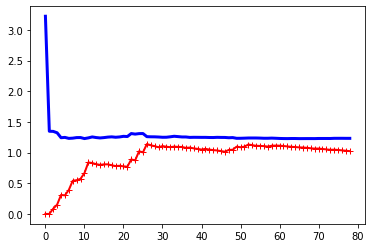

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

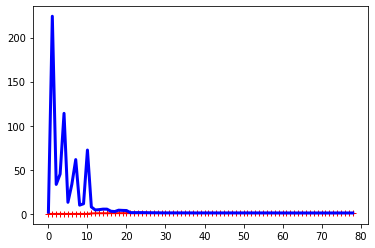

In [15]:
## 10차 다항 회귀 모델
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

### 4.6 로지스틱 회귀

In [16]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [17]:
X=iris["data"][:,3:] # 꽃입의 너비
y=(iris["target"]==2).astype(np.int)

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

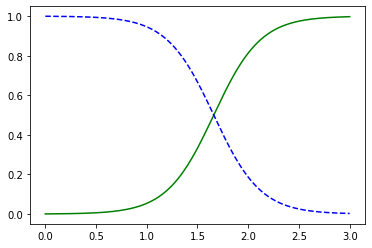

In [19]:
## 추정확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Now Iris virginica")


In [20]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### 4.6.4 소프트맥스 회귀

In [21]:
X = iris["data"][:,(2,3)]
y=iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])